In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fminbound

def func(x):
    """目标函数(单峰函数)"""
    result = np.exp(-x)+x**2
    return result

def golden(f, a, b, # [a, b]为搜索区间
           epsilon=1e-3, # 停止迭代条件
           maxstep=10000):
    a1 = b - 0.618*(b-a)
    a2 = a + 0.618*(b-a)
    f1 = f(a1)
    f2 = f(a2)
    locus = list() # 迭代轨迹
    for _ in range(maxstep):
        locus.append([a, b])
        if b - a < epsilon: # 满足迭代条件时跳出循环
            issue = (b+a)/2 # 最终迭代结果
            return np.array(locus), issue
        if f1<f2: # 比较函数值大小
            b = a2
            a2 = a1
            a1 = b - 0.618*(b-a)
            f2 = f1
            f1 = f(a1)
        else:
            a = a1
            a1 = a2
            f1 = f2
            a2 = a + 0.618*(b-a)
            f2 = f(a2)
            

def plot_picture(f, a, b, locus):
    """绘制整个迭代过程"""
    x = np.linspace(a, b, 1000)
    y = f(x)
    y_locus = f(locus)
    plt.plot(x, y)
    plt.scatter(locus, y_locus)
    plt.show()

In [2]:
trajectory, solution = golden(func, 0, 1)
print("迭代轨迹为:\n", np.array(trajectory))
print("最优点和最优点的函数值为:", solution, func(solution))

迭代轨迹为:
 [[0.         1.        ]
 [0.         0.618     ]
 [0.236076   0.618     ]
 [0.236076   0.47210503]
 [0.236076   0.382     ]
 [0.29181897 0.382     ]
 [0.32623909 0.382     ]
 [0.32623909 0.36069933]
 [0.3394029  0.36069933]
 [0.34755085 0.36069933]
 [0.34755085 0.35567661]
 [0.35065489 0.35567661]
 [0.35065489 0.35375831]
 [0.35065489 0.3525641 ]
 [0.35138421 0.3525641 ]
 [0.35138421 0.35211338]]
最优点和最优点的函数值为: 0.3517487917821026 0.8271840264349385


In [3]:
min_global = fminbound(func, 0, 1) # 调用的scipy库中的fminboud函数进行验证
print('min_global= ', min_global)

min_global=  0.35173538036861207


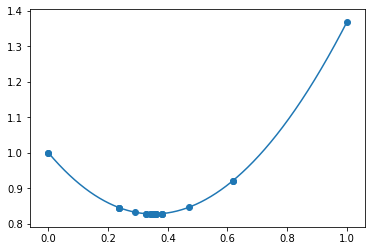

In [4]:
plot_picture(func, 0, 1, trajectory)